In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rng
from scipy.io import arff

In [18]:
spf_data = arff.loadarff('steel-plates-fault.arff')
spf_df = pd.DataFrame(spf_data[0])
spf_da = spf_df.to_numpy()
spf_x = spf_da[:, :-1]
spf_y = spf_da[:, -1]

io_data = arff.loadarff('ionosphere.arff')
io_df = pd.DataFrame(io_data[0])
io_da = io_df.to_numpy()
io_x = io_da[:, :-1]
io_y = io_da[:, -1]

ba_data = arff.loadarff('banknote-authentication.arff')
ba_df = pd.DataFrame(ba_data[0])
ba_da = ba_df.to_numpy()
ba_x = ba_da[:, :-1]
ba_y = ba_da[:, -1]


In [64]:
from matplotlib import pyplot as plt
from numpy import average
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

neighbor_value = [1,2,3,4,5]
knn_steelplate_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_steelplate_accuracy = accuracy_score(y_test, pre_y)
        knn_steelplate_accuracy_list.append(knn_steelplate_accuracy)
knn_steelplate_accuracy_final = pd.DataFrame( { '1': knn_steelplate_accuracy_list[0:50], 
                                            '2': knn_steelplate_accuracy_list[50:100], 
                                            '3': knn_steelplate_accuracy_list[100:150], 
                                            '4': knn_steelplate_accuracy_list[150:200], 
                                            '5': knn_steelplate_accuracy_list[200:250] } )

knn_ionosphere_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_ionosphere_accuracy = accuracy_score(y_test, pre_y)
        knn_ionosphere_accuracy_list.append(knn_ionosphere_accuracy)
knn_ionosphere_accuracy_final = pd.DataFrame( { '1': knn_ionosphere_accuracy_list[0:50], 
                                            '2': knn_ionosphere_accuracy_list[50:100], 
                                            '3': knn_ionosphere_accuracy_list[100:150], 
                                            '4': knn_ionosphere_accuracy_list[150:200], 
                                            '5': knn_ionosphere_accuracy_list[200:250] } )

knn_banknote_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_banknote_accuracy = accuracy_score(y_test, pre_y)
        knn_banknote_list.append(knn_banknote_accuracy)
knn_banknote_accuracy_final = pd.DataFrame( { '1': knn_banknote_list[0:50], 
                                            '2': knn_banknote_list[50:100], 
                                            '3': knn_banknote_list[100:150], 
                                            '4': knn_banknote_list[150:200], 
                                            '5': knn_banknote_list[200:250] } )    

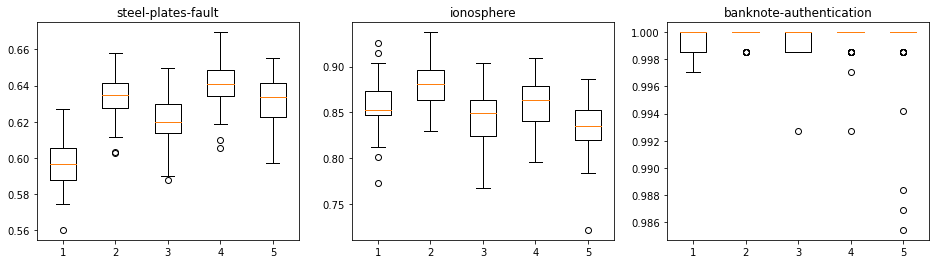

In [70]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(knn_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(knn_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(knn_banknote_accuracy_final)
plt.show()

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb_steelplate_accuracy_list = []
gnb_neighbor_value = [1e-9,1e-5,1e-1]
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('int') # convert to string
        gnb_y_test = gnb_y_test.astype('int') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_steelplate_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_steelplate_accuracy_list.append(gnb_steelplate_accuracy)
gnb_steelplate_accuracy_final = pd.DataFrame( { '1': gnb_steelplate_accuracy_list[0:50], 
                                            '2': gnb_steelplate_accuracy_list[50:100], 
                                            '3': gnb_steelplate_accuracy_list[100:150], } )

gnb_ionosphere_accuracy_list = []
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('str') # convert to string
        gnb_y_test = gnb_y_test.astype('str') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_ionosphere_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_ionosphere_accuracy_list.append(gnb_ionosphere_accuracy)
gnb_ionosphere_accuracy_final = pd.DataFrame( { '1': gnb_ionosphere_accuracy_list[0:50], 
                                            '2': gnb_ionosphere_accuracy_list[50:100], 
                                            '3': gnb_ionosphere_accuracy_list[100:150], } )

gnb_banknote_accuracy_list = []
for n in gnb_neighbor_value:
    for i in range(50):
        gnb_X_train, gnb_X_test, gnb_y_train, gnb_y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        gnb_y_train=gnb_y_train.astype('str') # convert to string
        gnb_y_test = gnb_y_test.astype('str') # convert to string
        gnb = GaussianNB(priors=None, var_smoothing=n)
        gnb.fit(gnb_X_train, gnb_y_train)
        gnb_y_pred = gnb.predict(gnb_X_test) 
        gnb_banknote_accuracy = accuracy_score(gnb_y_test, gnb_y_pred)
        gnb_banknote_accuracy_list.append(gnb_banknote_accuracy)
gnb_banknote_accuracy_final = pd.DataFrame( { '1': gnb_banknote_accuracy_list[0:50], 
                                            '2': gnb_banknote_accuracy_list[50:100], 
                                            '3': gnb_banknote_accuracy_list[100:150], } )



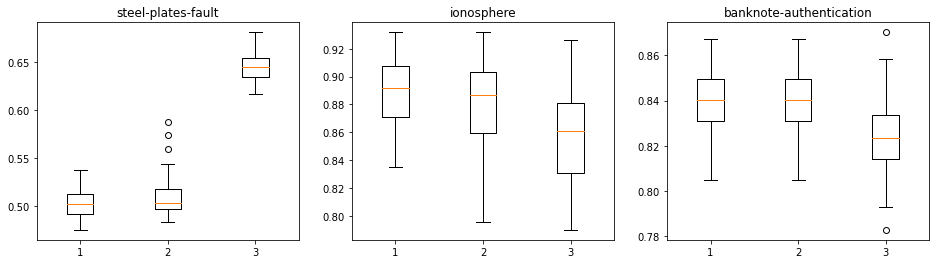

In [72]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(gnb_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(gnb_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(gnb_banknote_accuracy_final)
plt.show()

In [74]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_steelplate_accuracy_list = []
lr_neighbor_value = [0.1,0.5,1.0,2.0,5.0]

for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr.coef_
        lr_steelplate_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_steelplate_accuracy_list.append(lr_steelplate_accuracy)

lr_steelplate_accuracy_final = pd.DataFrame( { '1': lr_steelplate_accuracy_list[0:50], 
                                            '2': lr_steelplate_accuracy_list[50:100], 
                                            '3': lr_steelplate_accuracy_list[100:150], 
                                            '4': lr_steelplate_accuracy_list[150:200], 
                                            '5': lr_steelplate_accuracy_list[200:250] } )

lr_ionosphere_accuracy_list = []
for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(io_x, io_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr_ionosphere_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_ionosphere_accuracy_list.append(lr_ionosphere_accuracy)
lr_ionosphere_accuracy_final = pd.DataFrame( { '1': lr_ionosphere_accuracy_list[0:50],
                                            '2': lr_ionosphere_accuracy_list[50:100],
                                            '3': lr_ionosphere_accuracy_list[100:150], 
                                            '4': lr_ionosphere_accuracy_list[150:200],
                                            '5': lr_ionosphere_accuracy_list[150:200]} )

lr_banknote_accuracy_list = []
for n in lr_neighbor_value:
    for i in range(50):
        lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(ba_x, ba_y, test_size=0.5, random_state=i)
        lr_y_train=lr_y_train.astype('str') # convert to string
        lr_y_test = lr_y_test.astype('str') # convert to string
        lr = LogisticRegression(C=n)
        lr.fit(lr_X_train, lr_y_train)
        y_pred = lr.predict(lr_X_test)
        lr_banknote_accuracy = accuracy_score(lr_y_test, y_pred)
        lr_banknote_accuracy_list.append(lr_banknote_accuracy)
lr_banknote_accuracy_final = pd.DataFrame( { '1': lr_banknote_accuracy_list[0:50],
                                            '2': lr_banknote_accuracy_list[50:100],
                                            '3': lr_banknote_accuracy_list[100:150],
                                            '4': lr_banknote_accuracy_list[150:200],
                                            '5': lr_banknote_accuracy_list[200:250]} )


/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

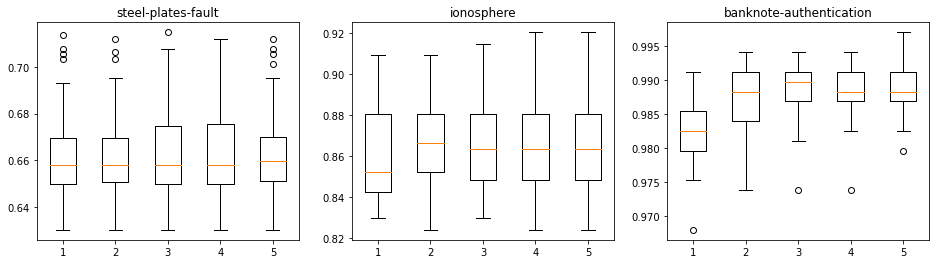

In [73]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].title.set_text('steel-plates-fault')
ax[0].boxplot(lr_steelplate_accuracy_final)
ax[1].title.set_text('ionosphere')
ax[1].boxplot(lr_ionosphere_accuracy_final)
ax[2].title.set_text('banknote-authentication')
ax[2].boxplot(lr_banknote_accuracy_final)
plt.show()

In [44]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dtc_steelplate_accuracy_list = []
dtc_neighbor_value = [1,3,5,8,10]

for n in dtc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(spf_x, spf_y, test_size=0.5, random_state=i)
        
        clf = DecisionTreeClassifier(max_leaf_nodes=n, random_state=i)
        # clf.fit(X_train, y_train)



ValueError: Unknown label type: 'unknown'